### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [14]:
data = pd.read_csv('data/coupons.csv')

In [15]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [16]:
# Investigate the dataset for missing or problematic data. 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [39]:
# get all columns with missing values
missing_cols = [col for col in data.columns if data[col].isnull().any()]

# show examples of non-null values for each of these cols. show only values in that col
for col in missing_cols:
    print(f"{col} has {data[col].isnull().sum()} missing values. Non-null values:")
    values = data[data[col].notnull()][col].unique()
    # print values with count
    for value in values:
        print(f"{value} ({data[data[col] == value].shape[0]})")
    print()

# drop the car col
data.drop('car', axis=1, inplace=True)
# drop the rows with missing values
data.dropna(inplace=True)
# show info again
data.info()


car has 12576 missing values. Non-null values:
Scooter and motorcycle (22)
crossover (21)
Mazda5 (22)
do not drive (22)
Car that is too old to install Onstar :D (21)

Bar has 107 missing values. Non-null values:
never (5197)
less1 (3482)
1~3 (2473)
gt8 (349)
4~8 (1076)

CoffeeHouse has 217 missing values. Non-null values:
never (2962)
less1 (3385)
4~8 (1784)
1~3 (3225)
gt8 (1111)

CarryAway has 151 missing values. Non-null values:
4~8 (4258)
1~3 (4672)
gt8 (1594)
less1 (1856)
never (153)

RestaurantLessThan20 has 130 missing values. Non-null values:
4~8 (3580)
1~3 (5376)
less1 (2093)
gt8 (1285)
never (220)

Restaurant20To50 has 189 missing values. Non-null values:
1~3 (3290)
less1 (6077)
never (2136)
gt8 (264)
4~8 (728)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   pass

4. What proportion of the total observations chose to accept the coupon? 



In [56]:
# show % of col Y
data['Y'].value_counts(normalize=True)[1]

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

/Users/stephenreid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

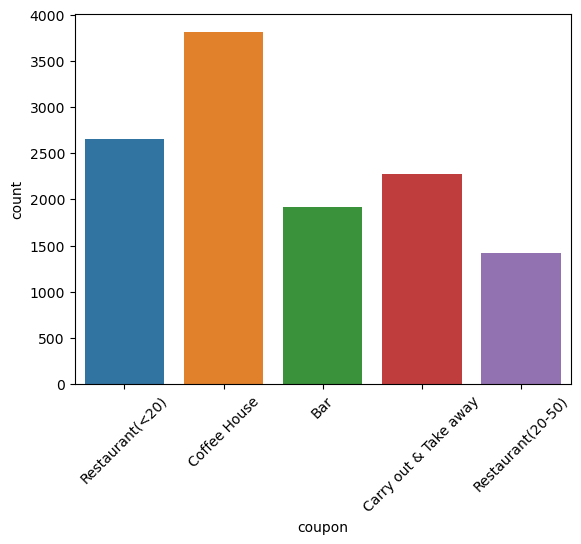

In [43]:
# bar plot of coupon col
sns.countplot(data['coupon'])
# rotate x labels
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

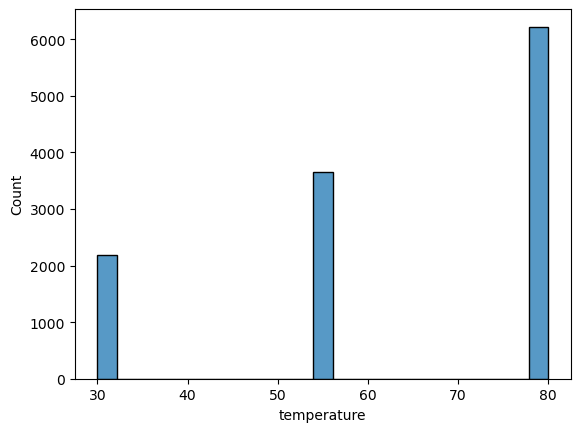

In [50]:
# histogram of temperature
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [51]:
# Create a new `DataFrame` that contains just the bar coupons.
bar_data = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [58]:
# What proportion of bar coupons were accepted?
bar_data['Y'].value_counts(normalize=True)[1]

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [80]:
bar_data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

0.37267441860465117
0.7616580310880829


Text(0, 0.5, 'Proportion of bar coupons accepted')

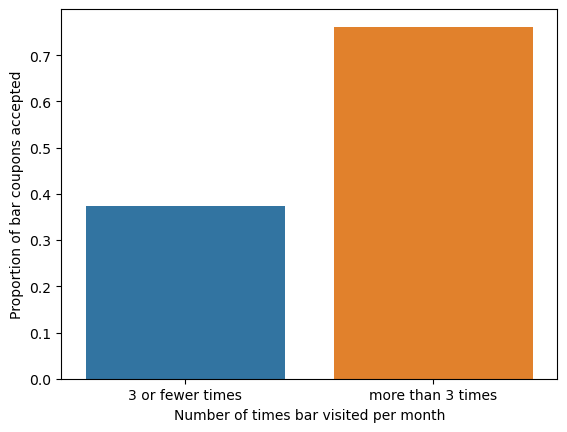

In [131]:
bar_3_or_fewer_times_statuses = ['never', 'less1', '1~3']
bar_more_than_3_times_statuses = ['4~8', 'gt8']

bar_3_or_fewer_times_data = bar_data[bar_data['Bar'].isin(bar_3_or_fewer_times_statuses)]
p1 = bar_3_or_fewer_times_data['Y'].value_counts(normalize=True)[1]
print(p1)

bar_more_than_3_times_data = bar_data[bar_data['Bar'].isin(bar_more_than_3_times_statuses)]
p2 = bar_more_than_3_times_data['Y'].value_counts(normalize=True)[1]
print(p2)

# plot p1 and p2
sns.barplot(x=['3 or fewer times', 'more than 3 times'], y=[p1, p2])
# add x and y labels
plt.xlabel('Number of times bar visited per month')
plt.ylabel('Proportion of bar coupons accepted')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [86]:
bar_more_than_once_a_month_data['age'].unique()

array(['21', '26', '31', '50plus', '41', '36', '46', 'below21'],
      dtype=object)

0.6898263027295285


(array([0, 1]),
 [Text(0, 0, 'Bar more than once a month and age over 25'),
  Text(1, 0, 'Everyone else')])

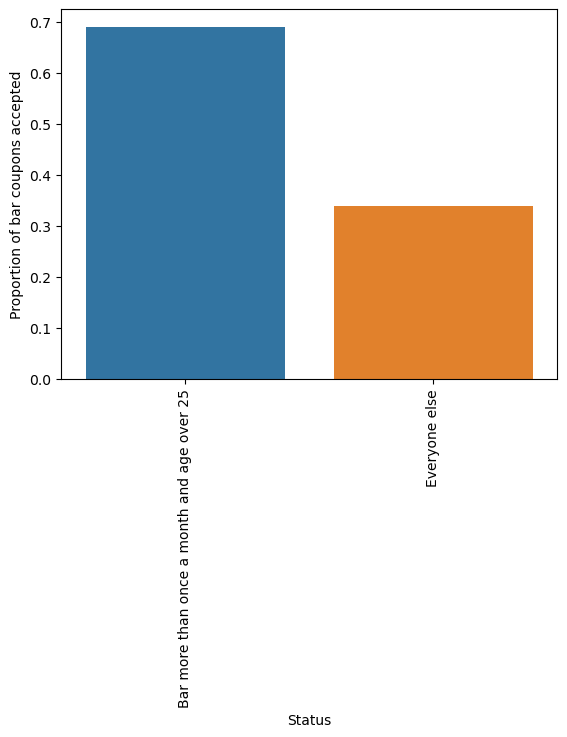

In [145]:
bar_more_than_once_a_month_statuses = ['1~3', '4~8', 'gt8']
age_over_25_statuses = ['26', '31', '50plus', '41', '36', '46']

# bar more than once a month and age over 25
row_ids = bar_data['Bar'].isin(bar_more_than_once_a_month_statuses) & bar_data['age'].isin(age_over_25_statuses)
bar_more_than_once_a_month_and_age_over_25_data = bar_data[row_ids]
p1 = bar_more_than_once_a_month_and_age_over_25_data['Y'].value_counts(normalize=True)[1]
print(p1)

# everyone else
everyone_else = bar_data[~row_ids]
p2 = everyone_else['Y'].value_counts(normalize=True)[1]

# plot p1 and p2
sns.barplot(x=['Bar more than once a month and age over 25', 'Everyone else'], y=[p1, p2])
# add x and y labels
plt.xlabel('Status')
plt.ylabel('Proportion of bar coupons accepted')
# rotate x
plt.xticks(rotation=90)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [107]:
bar_data['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [116]:
bar_data['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

0.7094339622641509


(array([0, 1]),
 [Text(0, 0, 'Bar more than once a month, passenger not a kid, occupation not FFF'),
  Text(1, 0, 'Everyone else')])

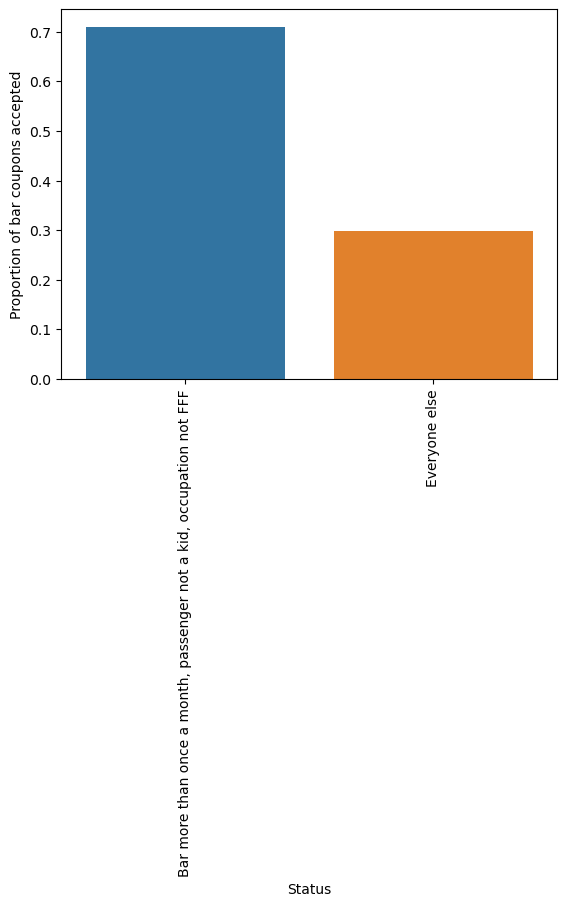

In [122]:
bar_more_than_once_a_month_statuses = ['1~3', '4~8', 'gt8']

passenger_statuses = bar_data['passanger'].unique().tolist()
passenger_not_a_kid_statuses = passenger_statuses[:]
passenger_not_a_kid_statuses.remove('Kid(s)')

occupation_statuses = bar_data['occupation'].unique().tolist()
occupation_not_fff_statuses = occupation_statuses[:]
occupation_not_fff_statuses.remove('Farming Fishing & Forestry')

# bar more than once a month, passenger not a kid, occupation not fff
row_ids = bar_data['Bar'].isin(bar_more_than_once_a_month_statuses) & bar_data['passanger'].isin(passenger_not_a_kid_statuses) & bar_data['occupation'].isin(occupation_not_fff_statuses)
bar_more_than_once_a_month_and_passenger_not_a_kid_and_occupation_not_fff_data = bar_data[row_ids]
p1 = bar_more_than_once_a_month_and_passenger_not_a_kid_and_occupation_not_fff_data['Y'].value_counts(normalize=True)[1]
print(p1)

# everyone else
everyone_else = bar_data[~row_ids]
p2 = everyone_else['Y'].value_counts(normalize=True)[1]

# plot p1 and p2
sns.barplot(x=['Bar more than once a month, passenger not a kid, occupation not FFF', 'Everyone else'], y=[p1, p2])
# add x and y labels
plt.xlabel('Status')
plt.ylabel('Proportion of bar coupons accepted')
# rotate x
plt.xticks(rotation=90)



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [124]:
bar_data['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [126]:
bar_data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [127]:
bar_data['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

0.7094339622641509
0.7195121951219512
0.45645645645645644


(array([0, 1, 2]),
 [Text(0, 0, 'Bar more than once a month, passenger not a kid, not widowed'),
  Text(1, 0, 'Bar more than once a month and under 30'),
  Text(2, 0, 'Cheap restaurant more than 4 times a month and income less than 50K')])

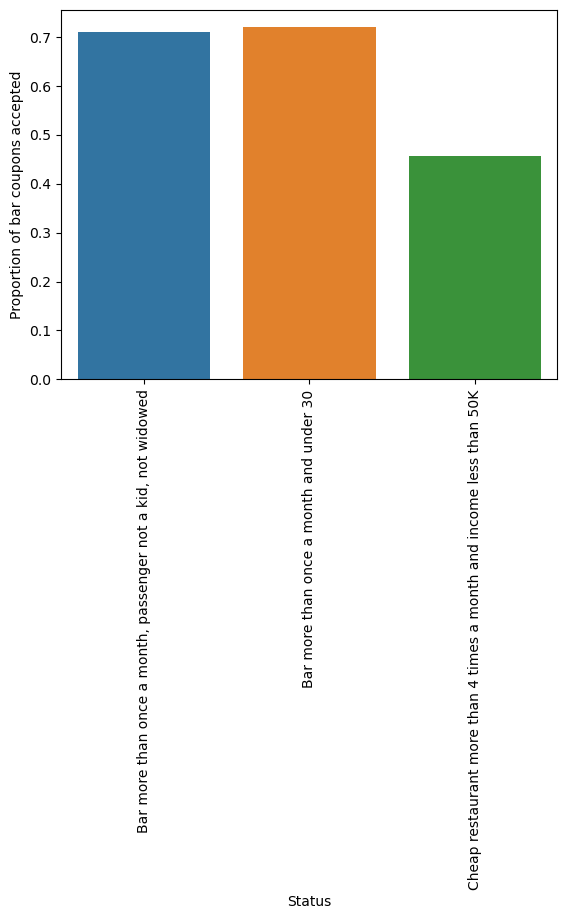

In [129]:
martial_statuses = bar_data['maritalStatus'].unique().tolist()
martial_statuses_not_widowed = martial_statuses[:]
martial_statuses_not_widowed.remove('Widowed')
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
row_ids = bar_data['Bar'].isin(bar_more_than_once_a_month_statuses) & bar_data['passanger'].isin(passenger_not_a_kid_statuses) & bar_data['maritalStatus'].isin(martial_statuses_not_widowed)
bar_more_than_once_a_month_and_passenger_not_a_kid_and_not_widowed_data = bar_data[row_ids]
p1 = bar_more_than_once_a_month_and_passenger_not_a_kid_and_not_widowed_data['Y'].value_counts(normalize=True)[1]
print(p1)

age_under_30_statuses = ['21', '26', 'below21']
# go to bars more than once a month and are under the age of 30
row_ids = bar_data['Bar'].isin(bar_more_than_once_a_month_statuses) & bar_data['age'].isin(age_under_30_statuses)
bar_more_than_once_a_month_and_under_30_data = bar_data[row_ids]
p2 = bar_more_than_once_a_month_and_under_30_data['Y'].value_counts(normalize=True)[1]
print(p2)

cheap_restaurant_more_than_4_times_a_month_statuses = ['4~8', 'gt8']
income_less_than_50K_statuses = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
# go to cheap restaurants more than 4 times a month and income is less than 50K. 
row_ids = bar_data['RestaurantLessThan20'].isin(cheap_restaurant_more_than_4_times_a_month_statuses) & bar_data['income'].isin(income_less_than_50K_statuses)
cheap_restaurant_more_than_4_times_a_month_and_income_less_than_50K_data = bar_data[row_ids]
p3 = cheap_restaurant_more_than_4_times_a_month_and_income_less_than_50K_data['Y'].value_counts(normalize=True)[1]
print(p3)

# plot p1, p2, and p3
sns.barplot(x=['Bar more than once a month, passenger not a kid, not widowed', 'Bar more than once a month and under 30', 'Cheap restaurant more than 4 times a month and income less than 50K'], y=[p1, p2, p3])
# add x and y labels
plt.xlabel('Status')
plt.ylabel('Proportion of bar coupons accepted')
# rotate x
plt.xticks(rotation=90)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I hypothesise that drivers who accept bar coupons are those who:
* go to bars frequently anyway
* are older
* don't have kids
* have disposable income

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [135]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [136]:
coffee_data = data[data['coupon'] == 'Coffee House']

In [146]:
# What proportion of bar coupons were accepted?
coffee_data['Y'].value_counts(normalize=True)[1]

0.49633123689727465

In [149]:
coffee_data['CoffeeHouse'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

0.44590495449949447
0.6725559481743227


Text(0, 0.5, 'Proportion of coffee coupons accepted')

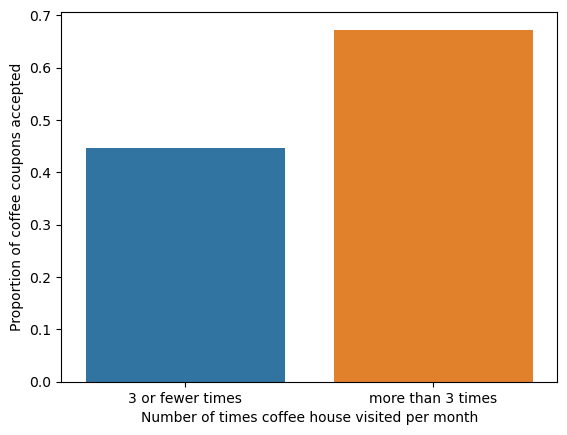

In [151]:
coffee_3_or_fewer_times_statuses = ['never', 'less1', '1~3']
coffee_more_than_3_times_statuses = ['4~8', 'gt8']

coffee_3_or_fewer_times_data = coffee_data[coffee_data['CoffeeHouse'].isin(coffee_3_or_fewer_times_statuses)]
p1 = coffee_3_or_fewer_times_data['Y'].value_counts(normalize=True)[1]
print(p1)

coffee_more_than_3_times_data = coffee_data[coffee_data['CoffeeHouse'].isin(coffee_more_than_3_times_statuses)]
p2 = coffee_more_than_3_times_data['Y'].value_counts(normalize=True)[1]
print(p2)

# plot p1 and p2
sns.barplot(x=['3 or fewer times', 'more than 3 times'], y=[p1, p2])
# add x and y labels
plt.xlabel('Number of times coffee house visited per month')
plt.ylabel('Proportion of coffee coupons accepted')

Sense check: People that regularly drink coffee anyway are more likely to use coffee coupons.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Healthcare Practitioners & Technical'),
  Text(1, 0, 'Building & Grounds Cleaning & Maintenance'),
  Text(2, 0, 'Transportation & Material Moving'),
  Text(3, 0, 'Healthcare Support'),
  Text(4, 0, 'Student'),
  Text(5, 0, 'Installation Maintenance & Repair'),
  Text(6, 0, 'Architecture & Engineering'),
  Text(7, 0, 'Farming Fishing & Forestry'),
  Text(8, 0, 'Unemployed'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Arts Design Entertainment Sports & Media'),
  Text(11, 0, 'Construction & Extraction'),
  Text(12, 0, 'Personal Care & Service'),
  Text(13, 0, 'Life Physical Social Science'),
  Text(14, 0, 'Business & Financial'),
  Text(15, 0, 'Management'),
  Text(16, 0, 'Production Occupations'),
  Text(17, 0, 'Protective Service'),
  Text(18, 0, 'Office & Administrative Support'),
  Text(19, 0, 'Education&Training&Library'),
  Text(20, 0, 'Re

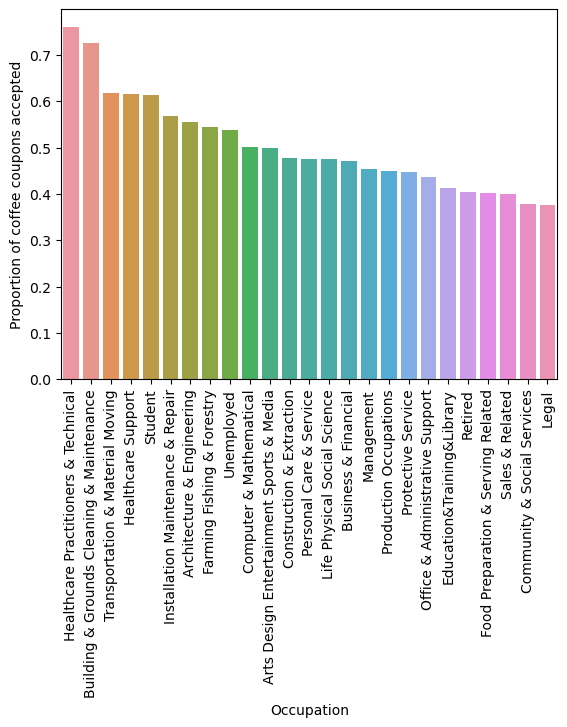

In [163]:
occupations = {}
# plot proportion of coupons accepted for each occupation
for occupation in coffee_data['occupation'].unique():
    occupation_data = coffee_data[coffee_data['occupation'] == occupation]
    p = occupation_data['Y'].value_counts(normalize=True)[1]
    occupations[occupation] = p    

# sort and plot
occupations = {k: v for k, v in sorted(occupations.items(), key=lambda item: -item[1])}
sns.barplot(x=list(occupations.keys()), y=list(occupations.values()))
# add x and y labels
plt.xlabel('Occupation')
plt.ylabel('Proportion of coffee coupons accepted')
# rotate x
plt.xticks(rotation=90)

Of all occupations, people working in Healthcare Practitioners & Technical and Building & Grounds Cleaning & Maintenance are most likely to use coffee coupons.

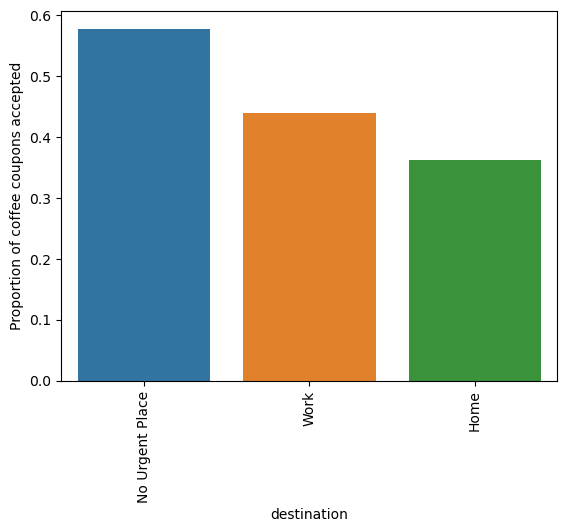

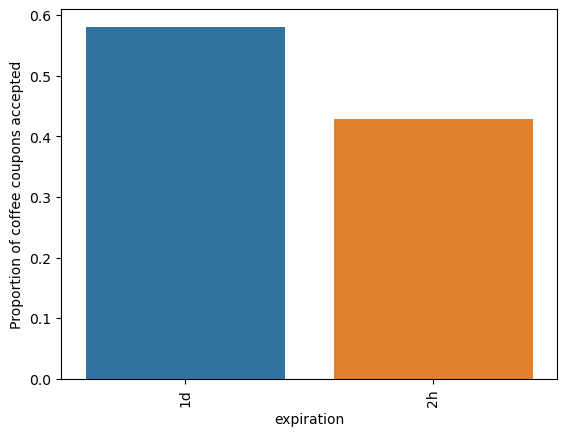

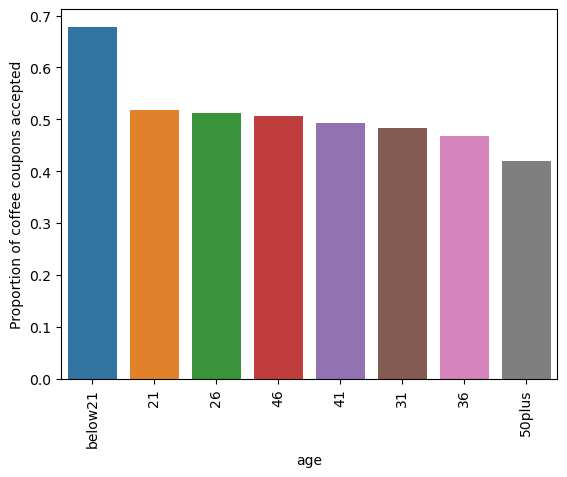

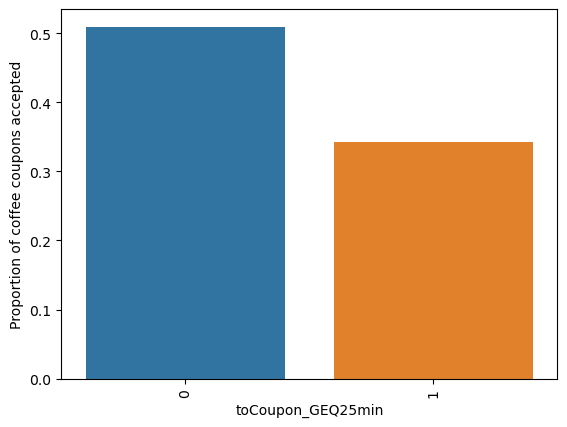

In [206]:
d = 0.1
# do the above for every col
for col in coffee_data.columns:   
    # skip final col
    if col == 'Y':
        continue
    p_values = {}
    # plot proportion of coupons accepted for each unique value of this col
    for f in coffee_data[col].unique():
        col_data = coffee_data[coffee_data[col] == f]
        p = col_data['Y'].value_counts(normalize=True)[1]
        p_values[f] = p    

    # sort and plot 
    p_values = sorted(p_values.items(), key=lambda item: -item[1])
    # if first is more than 0.1 than second
    if len(p_values) > 1:
        if p_values[0][1] > p_values[1][1]+d:
            p_values = {k: v for k, v in p_values}
            sns.barplot(x=list(p_values.keys()), y=list(p_values.values()))
            # add x and y labels
            plt.xlabel(col)
            plt.ylabel('Proportion of coffee coupons accepted')
            # rotate x
            plt.xticks(rotation=90)
    # show plot
    plt.show()

Some other notable groups of people likely to accept coffee coupons:

* People with no urgent destination (vs those travelling to work or home)
* People who receive a coupon with a 1d expiry (vs 2h)
* People under 21 (vs all other age groups)
* People closer than 25 minutes from the venue 